
## Engagement

The data sourced from 365 has a seperate file title 'student_engagement'.
However, exams and quizzes are not labelled with IDs meaning that repetition of exams and quizzes cannot be studied and understood.

This notebook will prepare and combine data regarding student's interaction with exams, quizzes, and student hub questions. And thereby derive a nuanced understanding of student's engagement with the platform.

#### Description

My prospective oversight for this notebook involves:

 - Importing notebooks (exams, quizzes, student hub questions)
 - Data cleaning & prepping
 - Creating either a KPI or list of sorts to represent student IDs based on engagement?
 
#### Update

I have divided the student engagement sample into two categories (above & below avg engagement).

From here much of the provided data can be divided based on engagement levels such as:
 - exams frequency and completion time.
 - quizzes freequency and completion time.
 - student hub questions.
 - student membership type? which type of membership is popular among the most and least engaged students.
 - Nationalities represented by engagement level.

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import import_ipynb
#This allows importing notebooks
import collections

In [8]:
# Dependencies 
from Student_info import student_info_cleaned
# from student_hub_questions import student_hub_country
from student_exams import student_exam_by_country
from student_quizzes import student_quiz_by_country
from student_purchases import student_purchases_by_country

# Dependencies from student_engagement
from student_engagement import above_avg_countries, below_avg_countries, above_avg_ID, below_avg_ID, student_engagement_by_country
# They are all dicts, Keys are labels and values are the frequency of representation



In [16]:
engagement_dates = student_engagement_by_country['date_engaged'].value_counts().to_dict()

engagement_dates_ordered = collections.OrderedDict(sorted(engagement_dates.items()))

purchase_dates = student_purchases_by_country['date_purchased'].value_counts().to_dict()

purchase_dates_ordered = collections.OrderedDict(sorted(purchase_dates.items()))

registration_dates = (student_info_cleaned['date_registered'].value_counts().to_dict())

registration_dates_ordered = collections.OrderedDict(sorted(registration_dates.items()))

# registration_dates_ordered 
# purchase_dates_ordered
# engagement_dates_ordered

In the above cell achieves several functions.

        value_counts() - Allows us to find the number of times a date is repeated in the dataframe.To us this means we are able to find the number of   engagement or registration or purchase to occur everyday across the year.
        
        to_dict() -  This function returns a dictionary. Vale_counts() will return a series of two columns, dates and frequency of occurrence .Using to_dict() we can convert the series to a dictionary with the dates as the key and the frequency of occurrence as the value.
        
        Collections.OrderedDict() - The resulting dictionary from to_dict() will be ordered based on the values and not the keys. We need it to be ordered based on the dates (keys) Jan 1st and so on. We use collections and OrderedDict() for this.
                
From the above steps we pbtain dictionaries for information on purchases,registration, and engagement.

Keys are the dates and the values are the frequency of occurences.

From these dictionaries we can track the level of engagement,registration and purchases across time.     
                

The below cell creates series for the dates and frequency of occurrence from the preceding dataframes.
These will then be exported to excel to create graphs.

In [20]:
engagement_dates_df = pd.DataFrame.from_dict(engagement_dates_ordered, orient ='index')
purchase_dates_df = pd.DataFrame.from_dict(purchase_dates_ordered, orient ='index')
registration_dates_df = pd.DataFrame.from_dict(registration_dates_ordered, orient ='index')


In [21]:
engagement_dates_df.to_excel("frequency of engagement.xlsx")
purchase_dates_df.to_excel("frequency of purchase.xlsx")
registration_dates_df.to_excel("frequency of registration.xlsx")


These Excel files will be loaded on to Tableau for visualization.

<function matplotlib.pyplot.show(close=None, block=None)>

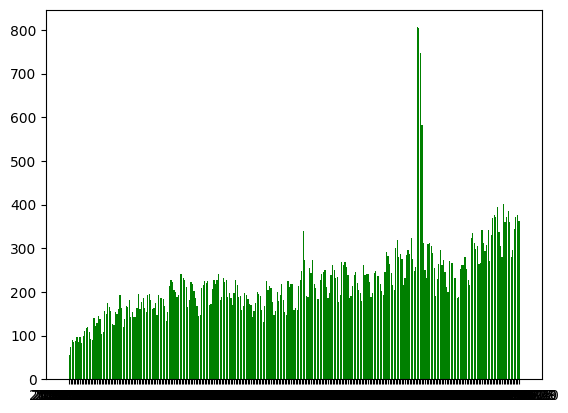

In [24]:
plt.bar(list(engagement_dates_ordered.keys()),engagement_dates_ordered.values(),color='g')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

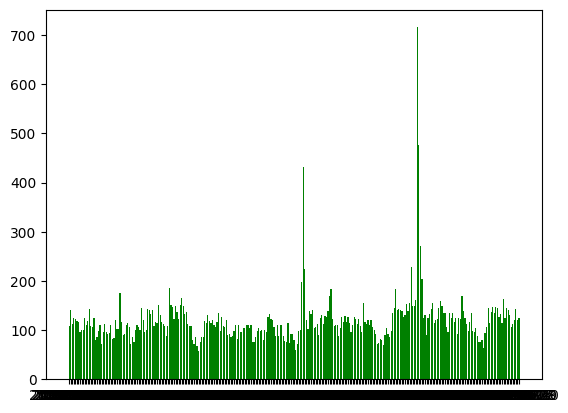

In [28]:
plt.bar(list(registration_dates_ordered.keys()),registration_dates_ordered.values(),color='g')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

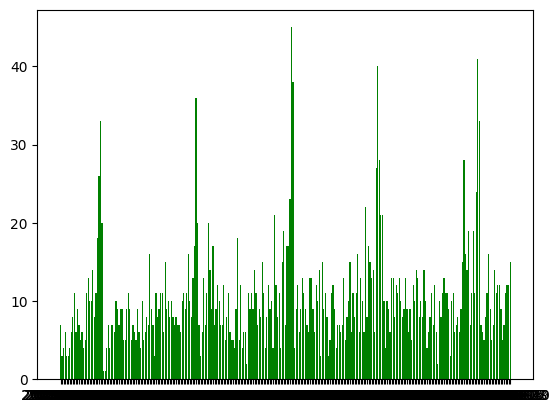

In [22]:
plt.bar(list(purchase_dates_ordered.keys()),purchase_dates_ordered.values(),color='g')
plt.show